<a href="https://colab.research.google.com/github/amritgos/FinRL/blob/master/FinRL_ensemble_stock_trading_ICAIF_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ## install finrl library
!pip install git+https://github.com/amritgos/FinRL.git

  Cloning https://github.com/amritgos/FinRL.git to /tmp/pip-req-build-b1bvhcz4
  Running command git clone -q https://github.com/amritgos/FinRL.git /tmp/pip-req-build-b1bvhcz4
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-p20qvcmp/pyfolio_2db0a2de9057428e937885f96deaae2d
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-p20qvcmp/pyfolio_2db0a2de9057428e937885f96deaae2d
     |████████████████████████████████| 161 kB 6.5 MB/s 
     |████████████████████████████████| 49.6 MB 6.9 kB/s 
     |████████████████████████████████| 1.8 MB 39.3 MB/s 
     |████████████████████████████████| 124 kB 44.3 MB/s 
     |████████████████████████████████| 108 kB 46.1 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 2.0 MB 33.7 MB/s 
     |████████████████████████████████| 153 kB 47.5 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 52 kB

In [2]:
!git clone https://github.com/amritgos/FinRL.git

Cloning into 'FinRL'...
remote: Enumerating objects: 3697, done.
remote: Counting objects: 100% (409/409), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 3697 (delta 246), reused 355 (delta 208), pack-reused 3288
Receiving objects: 100% (3697/3697), 45.04 MiB | 24.70 MiB/s, done.
Resolving deltas: 100% (2200/2200), done.


In [3]:
cd FinRL/

/content/FinRL


In [4]:
ls

contributing.md
datasets/
docker/
figs/
finrl/
FinRL_compare_eRL_RLlib_stablebaseline.ipynb
FinRL_ensemble_stock_trading_ICAIF_2020.ipynb
FinRL_portfolio_allocation_NeurIPS_2020.ipynb
FinRL_stock_trading_fundamental.ipynb
FinRL_stock_trading_NeurIPS_2018.ipynb
LICENSE*
main.py
README.md*
requirements.txt
setup.py
tutorials/
unit_testing/



<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them. 
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.apps import config
from finrl.neo_finrl.preprocessor.yahoodownloader import YahooDownloader
from finrl.neo_finrl.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.neo_finrl.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline, convert_daily_return_to_pyfolio_ts

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

<a id='1.4'></a>
## 2.4. Create Folders

In [7]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).




-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [8]:
df = YahooDownloader(start_date = '2016-01-01',
                     end_date = '2021-01-01',
                     ticker_list = config.SENSEX_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2016-01-01,882.950012,885.500000,878.500000,847.758850,17377.0,ASIANPAINT.BO,4
1,2016-01-01,450.000000,452.700012,445.799988,440.748108,433052.0,AXISBANK.BO,4
2,2016-01-01,2530.000000,2530.000000,2512.149902,2137.924316,9055.0,BAJAJ-AUTO.BO,4
3,2016-01-01,1990.000000,2010.000000,1960.500000,1980.499756,6305.0,BAJAJFINSV.BO,4
4,2016-01-01,602.255005,609.994995,600.590027,600.510315,10350.0,BAJFINANCE.BO,4


In [10]:
df.shape

(36960, 8)

# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [11]:
# vix_df = pd.read_csv('datasets/IndiaVIX_data.csv')
sentiment_df = pd.read_csv('datasets/Sentiment_Compiled.csv')

In [12]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    use_turbulence=False,
                    use_vix=False,
                    use_sentiment=True,
                    sentiment_df=sentiment_df,
                    user_defined_feature = True)

processed = fe.preprocess_data(df)

Successfully added technical indicators
Successfully added Sentiment Features
Successfully added user defined features


In [13]:
processed.sample(5)

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,tweets,news,daily_return,return_lag_1,return_lag_2
11310,2017-07-13,1132.699951,1143.900024,1121.000,1093.164307,112767.0,ASIANPAINT.BO,3,-3.047809,1135.789607,1065.169292,50.894953,-42.682224,15.300820,1107.322664,1098.689800,0.000000,0.000000,-0.007548,-0.005353,-0.005793
21384,2018-11-20,286.500000,288.649994,282.000,280.460327,913371.0,SBIN.BO,1,4.129593,302.375181,246.491786,52.050391,69.054986,27.352944,270.406503,276.939512,-0.017962,0.061127,-0.017870,-0.024974,-0.007886
13487,2017-10-27,688.000000,695.750000,686.375,667.526367,207966.0,M&M.BO,4,9.172841,683.299363,596.189230,58.067147,130.698422,34.131251,631.687693,643.811728,0.185139,0.182878,0.010573,0.015794,0.024732
6788,2016-12-05,1241.000000,1241.000000,1185.000,1136.680176,80394.0,HDFC.BO,0,-27.776915,1279.564893,1085.785034,40.286046,-95.443658,34.351525,1215.761084,1259.327358,-0.019647,-0.002650,-0.017338,-0.040474,-0.036491
27462,2019-09-20,1282.199951,1453.949951,1270.250,1412.631958,704761.0,INDUSINDBK.BO,4,-10.120561,1415.350170,1273.874781,50.973885,22.702712,6.775119,1363.381698,1396.039065,0.091951,0.055373,0.107375,0.067649,0.065326


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

In [14]:
train = data_split(processed, '2016-01-01','2019-07-01')
train

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,tweets,news,daily_return,return_lag_1,return_lag_2
0,2016-01-06,906.000000,912.000000,883.950012,853.923279,187735.0,ASIANPAINT.BO,2,0.380458,872.990964,835.818759,58.301593,60.279597,54.290436,854.404861,854.404861,0.800036,0.059280,-0.015874,0.006700,0.007271
0,2016-01-06,439.700012,439.700012,429.799988,422.130493,730512.0,AXISBANK.BO,2,-0.639598,445.849726,414.579214,0.000000,-86.940415,100.000000,430.214470,430.214470,-0.004242,0.115783,-0.012719,-0.019237,-0.042241
0,2016-01-06,2495.000000,2513.699951,2475.000000,2108.613281,11975.0,BAJAJ-AUTO.BO,2,-0.849310,2145.600723,2092.304428,17.219847,-94.324774,100.000000,2118.952576,2118.952576,0.000000,0.003962,-0.004625,-0.001065,-0.013710
0,2016-01-06,1940.000000,1954.750000,1932.000000,1938.521851,2052.0,BAJAJFINSV.BO,2,-1.526875,1993.066264,1916.058980,0.000000,-88.366896,100.000000,1954.562622,1954.562622,-0.069511,-0.043120,-0.001515,-0.009830,-0.021196
0,2016-01-06,597.900024,618.000000,595.559998,605.033569,22360.0,BAJFINANCE.BO,2,0.137747,609.726318,587.589935,61.519051,106.672756,56.426448,598.658127,598.658127,0.096922,-0.029449,0.022184,0.013141,0.007532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,2019-06-28,405.850006,409.700012,398.250000,390.352905,381226.0,SUNPHARMA.BO,4,-6.450453,406.149868,361.794026,45.500897,10.540080,13.645589,390.421046,415.639042,0.074625,0.057017,-0.004469,0.004257,0.040343
856,2019-06-28,2255.000000,2261.250000,2222.949951,2118.549561,99596.0,TCS.BO,4,30.868157,2191.806528,2063.536466,56.343044,49.432221,2.082357,2076.118197,2038.381641,0.148089,0.034361,-0.011276,-0.011736,-0.017426
856,2019-06-28,709.000000,715.000000,704.400024,646.470215,107082.0,TECHM.BO,4,-13.522017,708.491738,644.253391,39.033539,-166.271726,46.783293,679.987457,706.450402,0.112652,0.067579,0.006126,-0.016639,-0.025190
856,2019-06-28,1320.000000,1336.800049,1318.000000,1315.642456,31463.0,TITAN.BO,4,30.528909,1317.760233,1212.834799,67.726468,155.000128,48.424734,1247.607454,1176.327264,0.069511,0.014545,0.004553,0.019514,0.012592


In [15]:
sent = 1
tech = 1
user = 1
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + (tech*len(config.TECHNICAL_INDICATORS_LIST)+sent*len(config.SENTIMENT_INDICATORS_LIST)+user*len(config.USER_INDICATORS_LIST))*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 30, State Space: 451


In [16]:
env_kwargs = {
    "hmax": 1000, 
    "initial_amount": 10000000, 
    "buy_cost_pct": 0.001, 
    "sell_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
    # "tech_indicator_list": [],
    "sentiment_indicator_list": config.SENTIMENT_INDICATORS_LIST, 
    # "user_indicator_list": [],
    "user_indicator_list": config.USER_INDICATORS_LIST, 
    "action_space": stock_dimension, 
    "turbulence_threshold": None,
    "reward_scaling": 1e-4,
    "print_verbosity":5
}

# print(config.TECHNICAL_INDICATORS_LIST,config.SENTIMENT_INDICATORS_LIST,config.USER_INDICATORS_LIST)

e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [17]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

* In this notebook, we are training and validating 3 agents (A2C, PPO, DDPG) using Rolling-window Ensemble Method ([reference code](https://github.com/AI4Finance-LLC/Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020/blob/80415db8fa7b2179df6bd7e81ce4fe8dbf913806/model/models.py#L92))

In [20]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)
train_start = '2016-01-01'
train_end = '2019-07-01'
val_test_start = '2019-07-01'
val_test_end = '2021-01-01'

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(train_start,train_end),
                 val_test_period=(val_test_start,val_test_end),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs)

TypeError: ignored

In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.01,
                    'learning_rate': 0.0005
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 64
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 100_000,
                      "learning_rate": 0.000005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 30_000, 
                 'ppo' : 100_000, 
                 'ddpg' : 10_000
                 }


timesteps_dict = {'a2c' : 10_000, 
                 'ppo' : 10_000, 
                 'ddpg' : 10_000
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  208.11619437156776
======Model training from:  2009-01-01 to  2020-04-02
======A2C Training========
{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0005}
Using cpu device
Logging to tensorboard_log/a2c/a2c_126_3
------------------------------------
| time/                 |          |
|    fps                | 85       |
|    iterations         | 100      |
|    time_elapsed       | 5        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -42.6    |
|    explained_variance | 0.0748   |
|    learning_rate      | 0.0005   |
|    n_updates          | 99       |
|    policy_loss        | -60.3    |
|    std                | 1        |
|    value_loss         | 2.58     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 87       |
|    iterations         | 200      |
|    time_

In [ ]:
df_summary

NameError: ignored

<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

In [18]:
# initialize
agent = DRLAgent(env = env_train)
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.005}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

trained_a2c = agent.train_model(model=model_a2c, 
                                tb_log_name='a2c',
                                total_timesteps=50000)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.005}
Using cuda device
Logging to tensorboard_log/a2c/a2c_1
------------------------------------
| time/                 |          |
|    fps                | 90       |
|    iterations         | 100      |
|    time_elapsed       | 5        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -42.3    |
|    explained_variance | 0        |
|    learning_rate      | 0.005    |
|    n_updates          | 99       |
|    policy_loss        | 458      |
|    std                | 0.998    |
|    value_loss         | 181      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 108      |
|    iterations         | 200      |
|    time_elapsed       | 9        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -42      |
|    explained_variance | 0        |

In [19]:
trade = data_split(processed,'2019-07-01', '2021-01-01')
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)

In [20]:
df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_a2c,
                        environment = e_trade_gym)

hit end!


In [21]:
df_actions.to_csv('df_actions.csv')

In [107]:
from pyfolio import timeseries
s1 = get_daily_return(df_daily_return, value_col_name="account_value")
df_daily_return['daily_return'] = s1.values
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func( returns=DRL_strat, 
                              factor_returns=DRL_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")

In [108]:
print("==============DRL Strategy Stats===========")
perf_stats_all

==============DRL Strategy Stats===========


Annual return          0.245950
Cumulative returns     0.383493
Annual volatility      0.277532
Sharpe ratio           0.933410
Calmar ratio           0.750914
Stability              0.457111
Max drawdown          -0.327534
Omega ratio            1.204491
Sortino ratio          1.365939
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.968202
Daily value at risk   -0.033938
Alpha                  0.000000
Beta                   1.000000
dtype: float64

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (371, 8)
date
2019-12-30 00:00:00+00:00    0.003511
2019-12-31 00:00:00+00:00   -0.005091
2020-01-01 00:00:00+00:00   -0.001879
2020-01-02 00:00:00+00:00    0.003081
2020-01-03 00:00:00+00:00   -0.004506
                               ...   
2020-12-24 00:00:00+00:00    0.002916
2020-12-28 00:00:00+00:00    0.005977
2020-12-29 00:00:00+00:00   -0.003196
2020-12-30 00:00:00+00:00    0.008468
2020-12-31 00:00:00+00:00    0.001603
Length: 252, dtype: float64
date
2019-12-30 00:00:00+00:00   -0.000412
2019-12-31 00:00:00+00:00   -0.007321
2020-01-02 00:00:00+00:00    0.009039
2020-01-03 00:00:00+00:00   -0.003892
2020-01-06 00:00:00+00:00   -0.019004
                               ...   
2020-12-24 00:00:00+00:00    0.011398
2020-12-28 00:00:00+00:00    0.008094
2020-12-29 00:00:00+00:00    0.005476
2020-12-30 00:00:00+00:00    0.002796
2020-12-31 00:00:00+00:00    0.000107
Name: daily_return, Length:

Start date,2019-07-01
End date,2020-12-31
Total months,17
,Backtest
Annual return,24.595%
Cumulative returns,38.349%
Annual volatility,27.753%
Sharpe ratio,0.93
Calmar ratio,0.75
Stability,0.46
Max drawdown,-32.753%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,32.75,2020-02-04,2020-03-23,2020-07-30,128
1,8.67,2019-07-02,2019-08-05,2019-09-20,59
2,7.25,2020-09-18,2020-09-24,2020-10-27,28
3,5.24,2019-09-23,2019-10-07,2019-10-18,20
4,3.38,2019-10-29,2019-11-19,2019-12-23,40


KeyError: ignored

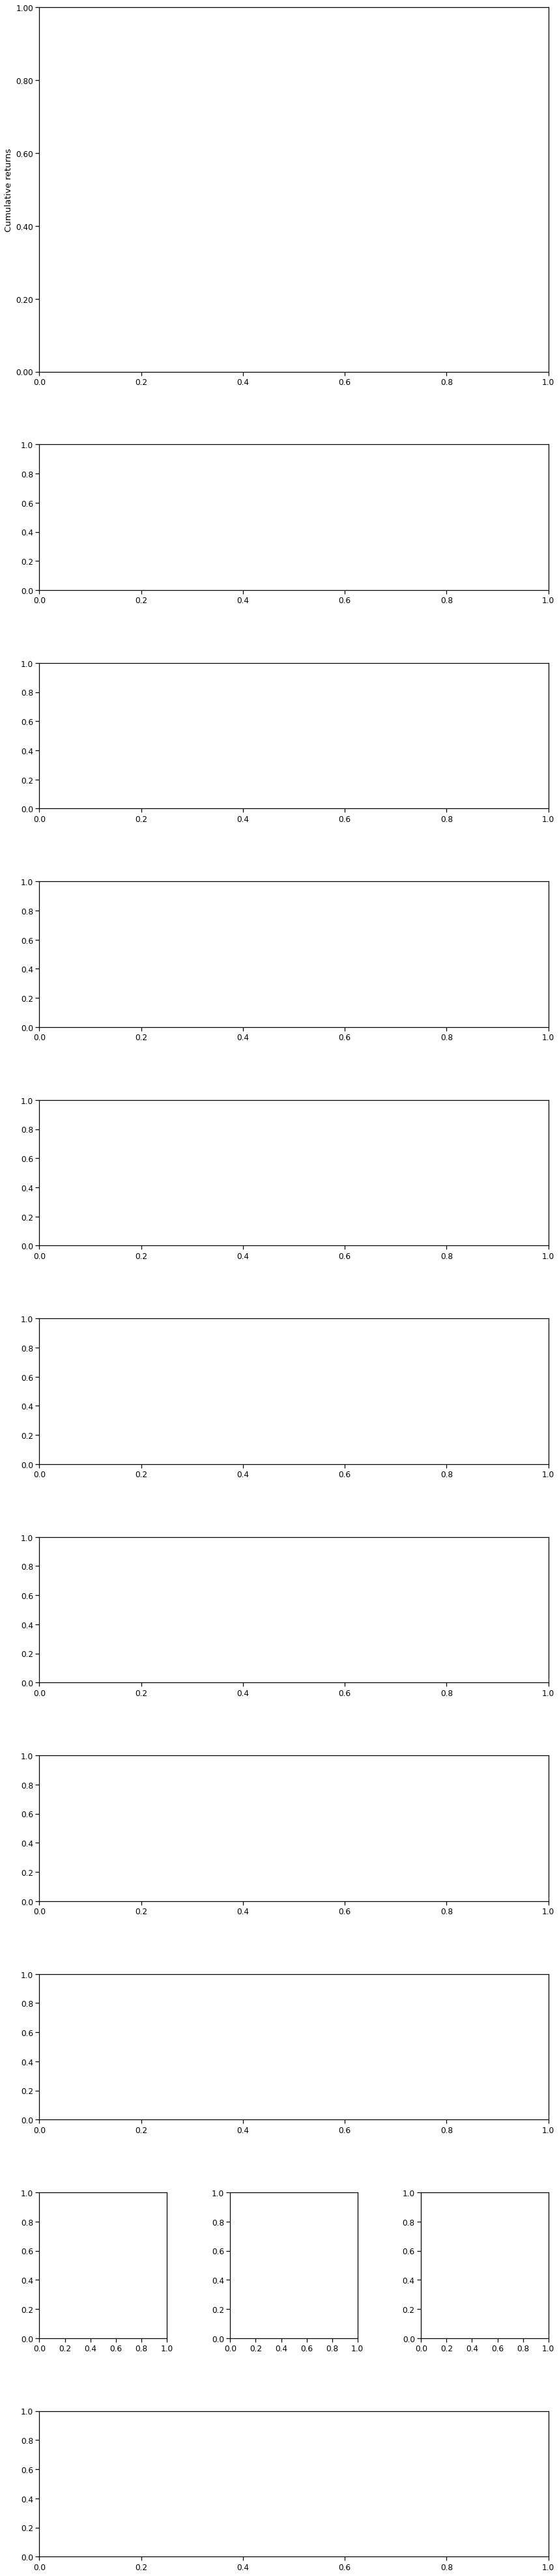

In [114]:
import pyfolio
import datetime as dt
%matplotlib inline

baseline_df = get_baseline(
        ticker='^BSESN', start='2019-07-01', end='2021-01-01')


baseline_returns = get_daily_return(baseline_df, value_col_name="close")
# baseline_returns = baseline_returns.append(pd.Series([0], index=[dt.datetime.strptime('2020-01-01', '%Y-%m-%d')]))

# DRL_strat = DRL_strat[DRL_strat.isin(baseline_returns)]
# baseline_returns = baseline_returns

print(DRL_strat[120:])
print(baseline_returns[120:])

with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = DRL_strat,
                                       benchmark_rets=baseline_returns, set_context=False)